# **Proyek Analisis Data: Ecommerce Dataset**
* Nama: Tania Syifa Utami
* Email: taniasu66@gmail.com
* ID Dicoding: taniassyifa

# **Pertanyaan Bisnis**

1. Apa saja kategori produk yang paling laris dijual?
2. Bagaimana tren pembelian barang dari bulan September 2016 hingga Oktober 2018 (dalam bulanan)?
3. Berapa rata-rata waktu delivery produk yang terjual?
4. Bagaimana segmentasi pelanggan berdasarkan RFM analysis?

# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
import matplotlib.ticker as ticker

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **DATA WRANGLING**

# **Gathering Data**

In [3]:
#LOAD THE DATASET
customers_df = pd.read_csv('customers_dataset.csv')
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [5]:
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [6]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [7]:
product_category_english_df = pd.read_csv('product_category_name_translation.csv')
product_category_english_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [8]:
product_df = pd.read_csv('products_dataset.csv')
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [9]:
sellers_df = pd.read_csv('sellers_dataset.csv')
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


# **Assessing Data**

In [10]:
csv_df = ['customers_dataset.csv',
          'order_items_dataset.csv',
          'order_payments_dataset.csv',
          'orders_dataset.csv',
          'product_category_name_translation.csv',
          'products_dataset.csv',
          'sellers_dataset.csv']

In [11]:
def check_tables(csv_files):
  for i, file_path in enumerate(csv_files):
    table_name = file_path.split('/')[-1].split('.')[0]
    print(f'Table {i+1}: {table_name}')
    df = pd.read_csv(file_path)
    print("Missing Values: ")
    print(df.isna().sum())
    print('\nInfo: ')
    print(df.info())
    print('\nDescription: ')
    print(df.describe())
    print('\nDuplicated Rows: ')
    print(df.duplicated().sum())
    print('\n')

In [12]:
check_tables(csv_df)

Table 1: customers_dataset
Missing Values: 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Description: 
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%  

### **Assesing Data Summary**

* customers_df:
  * Kapitalisasi nama kota
* order_items_df:
  * `shipping_limit_date` memiliki datatype yang salah, seharusnya datetime
* order_payments_df: Tidak ditemukan masalah
* orders_df:
  * Missing values pada `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`
  * `order_purchase_timestamp`,`order_approved_at`,`order_delivered_carrier_date`,`order_delivered_customer_date`,`order_estimated_delivery_date` memiliki datatype yang salah, seharusnya datetime
* product_category_english_df: Tidak ditemukan masalah tetapi kami menemukan bahwa tabel ini perlu digabung (merged) dengan product_df
* product_df:
  * Missing values pada `product_category_name`,`product_name_lenght`,`product_description_lenght`,`product_photos_qty`,`product_weight_g`,`product_length_cm`,`product_height_cm`,`product_width_cm`
  * nilai minimal `product_weight_g` adalah 0. Oleh karena itu akan diganti ke median
* sellers_df: Tidak ditemukan masalah




# **Cleaning Data**

## **customers_df**

**Kapitalisasi nama kota pelanggan**

In [13]:
customers_df['customer_city'] = customers_df['customer_city'].apply(lambda x: x.title())

## **order_items_df**

**Datatype yang salah**

In [14]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## **orders_df**

**Datatype yang salah**

In [16]:
datetime_column = ['order_purchase_timestamp','order_approved_at',
                   'order_delivered_carrier_date','order_delivered_customer_date',
                   'order_estimated_delivery_date']

for datetime in datetime_column:
  orders_df[datetime] = pd.to_datetime(orders_df[datetime])

**Missing Values**

In [17]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [18]:
orders_df['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Missing Value pada sejumlah data kolom tidak dapat dihilangkan, artinya beberapa order yang sebelumnya dibuat tidak dapat disalurkan atau terjadi pembatalan kepada pelanggan

> we can not drop missing values in some date columns because it were meant some orders were not delivered to the customers

## **product_df**

**Terdapat kesalahan nilai pada `product_weight_g`**

In [19]:
product_df[product_df['product_weight_g'] == 0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [20]:
product_df['product_weight_g'] = product_df['product_weight_g'].replace(0, product_df['product_weight_g'].median())

**Missing values**

In [21]:
product_df = product_df.dropna() #Drop all 610 Null rows , because they are not significant to affect the results (compare 32000+ data)

In [22]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## **sellers_df**

**Kapitalisasi nama kota seller**

In [23]:
sellers_df['seller_city'] = sellers_df['seller_city'].apply(lambda x: x.title())

## **Merge tabel product_df dan product_category_english_df**

In [24]:
products_df = pd.merge(
    left=product_df,
    right= product_category_english_df,
    how = 'left',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32339
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32340 non-null  object 
 1   product_category_name          32340 non-null  object 
 2   product_name_lenght            32340 non-null  float64
 3   product_description_lenght     32340 non-null  float64
 4   product_photos_qty             32340 non-null  float64
 5   product_weight_g               32340 non-null  float64
 6   product_length_cm              32340 non-null  float64
 7   product_height_cm              32340 non-null  float64
 8   product_width_cm               32340 non-null  float64
 9   product_category_name_english  32327 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.7+ MB


In [26]:
products_df[products_df['product_category_name_english'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1581,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5703,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7176,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7326,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8647,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
10822,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
13995,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
15874,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
16608,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN
17459,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,NaN


**Isi missing value pada dataset `product_category_english_df` dengan nilai 'Unspecified'**

In [27]:
products_df['product_category_name_english'].fillna(value='Unspecified', inplace=True)

In [28]:
products_df.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

# **Exploratory Data Analysis**

## **customers_df**

**Demografi pelanggan berdasarkan kota**

In [29]:
top_cities_df = customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending = False)
top_cities_df

customer_city
Sao Paulo         15540
Rio De Janeiro     6882
Belo Horizonte     2773
Brasilia           2131
Curitiba           1521
                  ...  
Ibiara                1
Rio Espera            1
Rio Dos Indios        1
Rio Dos Cedros        1
Lagoao                1
Name: customer_id, Length: 4119, dtype: int64

## **orders_items_df**

**Berapa nilai maksimum, minimum, dan rata-rata nilai order dalam BRL (Brazilian Real)?**

In [30]:
print('Maximum order of value (BRL): ', order_items_df['price'].max())
print('Minimum order of value (BRL): ', order_items_df['price'].min())
print('Average order of value (BRL): ', order_items_df['price'].mean())

Maximum order of value (BRL):  6735.0
Minimum order of value (BRL):  0.85
Average order of value (BRL):  120.65373901464716


Text(0, 0.5, 'Frequency')

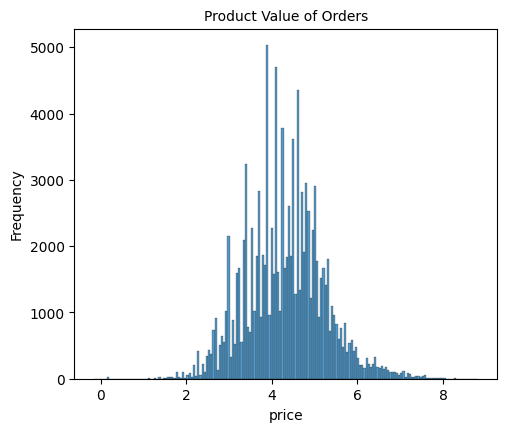

In [31]:
plt.figure(figsize=(12,10))

plt.subplot(221)
fig1 = sns.histplot(np.log(order_items_df['price']))
fig1.set_title('Product Value of Orders', fontsize=10)
fig1.set_ylabel('Frequency', fontsize=10)

Berdasarkan grafik 1, purchase value sudah sesuai dengan distribusi normal.

> Mayoritas produk order saat ini berupa **delivered products**. Hal ini menunjukkan bahwa produk tersebut sedang dalam masa pengiriman.

## **order_payments_df**

In [32]:
order_payments_df.groupby(by='payment_type').agg({
    'order_id': 'nunique',
    'payment_value': 'sum',
    'payment_installments': 'mean'
}, inplace=True)

,order_id,payment_value,payment_installments
payment_type,,,
boleto,19784,2869361.27,1.000000
credit_card,76505,12542084.19,3.507155
debit_card,1528,217989.79,1.000000
not_defined,3,0.00,1.000000
voucher,3866,379436.87,1.000000


> Berdasarkan data di atas, sistem kredit memiliki nilai pembelian terbesar yaitu 12.542.084,19 BRL dengan skema angsuran rata-rata terbanyak yaitu 3.5. Ini menunjukkan bahwa sebagian besar pelanggan lebih menyukai pembayaran secara kredit dibanding lainnya.

## **orders_df**

**Pengecekan status order**

In [33]:
orders_df.groupby(by='order_status').order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

> Mayoritas produk order saat ini berupa **delivered products**. Hal ini menunjukkan bahwa produk tersebut sedang dalam masa pengiriman

## **Exploration between product_category_english_df and product_df**

In [34]:
size_product_df = products_df.groupby('product_category_name_english').agg({
    'product_weight_g': ['max', 'min', 'mean'],
    'product_length_cm': ['max', 'min', 'mean'],
    'product_height_cm' : ['max', 'min', 'mean'],
    'product_width_cm': ['max', 'min', 'mean']
    },inplace=True)

size_product_df.head(10)

product_weight_g                      \
                                           max    min         mean   
product_category_name_english                                        
Unspecified                            10600.0  625.0  2266.461538   
agro_industry_and_commerce             30000.0   50.0  5263.405405   
air_conditioning                       23300.0  100.0  4459.959677   
art                                    15400.0  100.0  1691.763636   
arts_and_craftmanship                   6850.0  100.0  1164.578947   
audio                                   6663.0  100.0   641.637931   
auto                                   30000.0   50.0  2654.650526   
baby                                   30000.0   50.0  3655.201525   
bed_bath_table                         40425.0   25.0  2457.329482   
books_general_interest                 13300.0  100.0   746.611111   

                              product_length_cm                   \
                                            max   min       mean   
product_category_name_english                                      
Unspecified                                40.0  16.0  26.000000   
agro_industry_and_commerce                 99.0  11.0  36.527027   
air_conditioning                          105.0  16.0  36.467742   
art                                       100.0  16.0  35.927273   
arts_and_craftmanship                     105.0  16.0  28.368421   
audio                                      40.0  16.0  20.827586   
auto                                      105.0  14.0  34.050000   
baby                                      102.0  14.0  37.147059   
bed_bath_table                            105.0  12.0  36.774183   
books_general_interest                     40.0  11.0  23.481481   

                              product_height_cm                  \
                                            max  min       mean   
product_category_name_english                                     
Unspecified                                33.0  6.0  24.076923   
agro_industry_and_commerce                105.0  2.0  28.945946   
air_conditioning                           76.0  2.0  23.887097   
art                                        62.0  2.0  11.800000   
arts_and_craftmanship                      25.0  2.0   9.789474   
audio                                      31.0  2.0  11.500000   
auto                                       86.0  2.0  16.241579   
baby                                       97.0  2.0  21.617647   
bed_bath_table                             93.0  2.0  14.091119   
books_general_interest                     40.0  2.0   9.773148   

                              product_width_cm                   
                                           max   min       mean  
product_category_name_english                                    
Unspecified                               38.0  14.0  23.538462  
agro_industry_and_commerce                80.0  10.0  25.810811  
air_conditioning                          56.0   8.0  26.088710  
art                                       70.0  11.0  23.363636  
arts_and_craftmanship                     65.0  11.0  21.052632  
audio                                     32.0  11.0  17.344828  
auto                                      80.0   9.0  23.382105  
baby                                      84.0   8.0  28.717865  
bed_bath_table                           118.0   7.0  30.589964  
books_general_interest                    36.0  11.0  19.328704

## **sellers_df**

In [35]:
sellers_df.groupby(by=['seller_city', 'seller_state']).seller_id.nunique().sort_values(ascending=False)

seller_city     seller_state
Sao Paulo       SP              694
Curitiba        PR              124
Rio De Janeiro  RJ               93
Belo Horizonte  MG               66
Ribeirao Preto  SP               52
                               ... 
Itau De Minas   MG                1
Itapui          SP                1
Itaporanga      SP                1
Itapeva         SP                1
Xaxim           SC                1
Name: seller_id, Length: 636, dtype: int64

> Berdasarkan data di atas, terlihat bahwa lokasi yang paling banyak ditempati oleh seller adalah Sao Paulo. Ini sejalan mengapa sebagian besar pembeli produk berasal dari Sao Paulo

# **Visualization & Explanatory Analysis**

## **Pertanyaan 1: Kategori produk yang paling banyak dibeli oleh pelanggan**

In [36]:
#merge order_items_df and products_df to know most bought product categories by customers
order_product_item_df = pd.merge(
    left = order_items_df,
    right = products_df,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)
order_product_item_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


In [37]:
most_bought_df = order_product_item_df.groupby(by='product_category_name_english').agg({
    'order_id': 'nunique'
    }).rename(columns={
        'order_id':'order_count',
        'product_category_name_english': 'product_name'
    }).sort_values(by='order_count', ascending=False).reset_index()

most_bought_df

,product_category_name_english,order_count
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
...,...,...
67,Unspecified,22
68,la_cuisine,13
69,cds_dvds_musicals,12
70,fashion_childrens_clothes,8


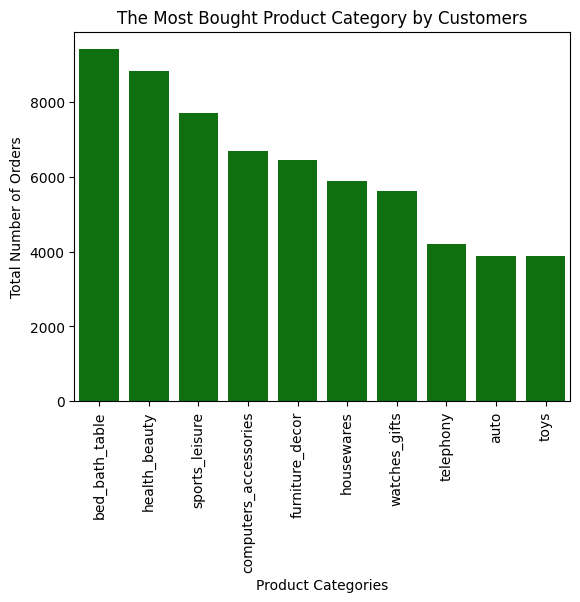

In [38]:
sns.barplot(x='product_category_name_english',
            y='order_count',
            data = most_bought_df[:10],
            color='green')
plt.title('The Most Bought Product Category by Customers')
plt.xlabel('Product Categories')
plt.ylabel('Total Number of Orders')
plt.xticks(rotation=90)
plt.show()

> bed_bath_table menjadi katagori produk yang paling diminati oleh pelanggan, disusul dengan health_beauty, sport_leisure, computer_accessories, dan furniture decor. Lima kategori teratas menunjukkan adanya tren pemenuhan gaya hidup yang menjadi kebutuhan.

## **Berapa total pelanggan, order, dan total pembelian dalam database?**

In [39]:
print('Number of customers: ', orders_df['customer_id'].nunique())
print('Number of orders: ', orders_df['order_id'].nunique())
print('Total of purchase amount: ', order_items_df['price'].sum())

Number of customers:  99441
Number of orders:  99441
Total of purchase amount:  13591643.700000003


> Nilai pembelian selama periode SEP 2016 - OKT 2018 mencapai **13.591.643 BRL**

## **Dari mana lokasi pelanggan berasal?**

In [40]:
order_customers_df = pd.merge(
    left = orders_df,
    right = customers_df,
    how = 'left',
    left_on = 'customer_id',
    right_on = 'customer_id'
)
order_customers_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,Barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,Vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,Sao Goncalo Do Amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,Santo Andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,Sao Jose Dos Campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,Praia Grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,Nova Vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,Japuiba,RJ


In [41]:
order_customers_df.groupby(by=['customer_city']).customer_id.nunique().sort_values(ascending=False)

customer_city
Sao Paulo         15540
Rio De Janeiro     6882
Belo Horizonte     2773
Brasilia           2131
Curitiba           1521
                  ...  
Ibiara                1
Rio Espera            1
Rio Dos Indios        1
Rio Dos Cedros        1
Lagoao                1
Name: customer_id, Length: 4119, dtype: int64

> Mayoritas pelanggan berlokasi di Sao Paulo, Rio De Janeiro, dan Belo Horizonte

## **Pertanyaan 2: Tren order dan pembelian (purchase amount)**

In [42]:
#merge orders_df with orders_product_item_df
orders_product_df = pd.merge(
    left = order_customers_df,
    right = order_product_item_df,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
orders_product_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [43]:
#create new columns for day, time, month, and year
orders_product_df['week_day'] = orders_product_df['order_purchase_timestamp'].dt.day_name()
orders_product_df['month'] = orders_product_df['order_purchase_timestamp'].dt.month_name()
orders_product_df['year'] = orders_product_df['order_purchase_timestamp'].dt.year
orders_product_df['hours'] = orders_product_df['order_purchase_timestamp'].dt.hour

In [44]:
orders_product_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,week_day,month,year,hours
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,housewares,Monday,October,2017,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,400.0,19.0,13.0,19.0,perfumery,Tuesday,July,2018,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,420.0,24.0,19.0,21.0,auto,Wednesday,August,2018,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,3.0,450.0,30.0,10.0,20.0,pet_shop,Saturday,November,2017,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,4.0,250.0,51.0,15.0,15.0,stationery,Tuesday,February,2018,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,4.0,4950.0,40.0,10.0,40.0,baby,Tuesday,February,2018,12
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,2.0,13300.0,32.0,90.0,22.0,home_appliances_2,Sunday,August,2017,14
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1.0,6550.0,20.0,20.0,20.0,computers_accessories,Monday,January,2018,21
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1.0,6550.0,20.0,20.0,20.0,computers_accessories,Monday,January,2018,21


### **Trend order (pemesanan) dalam bulan**

In [45]:
monthly_orders_df = orders_product_df.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id' : 'nunique',
    'price' : 'sum',
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df= monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    'order_id' : 'order_count',
    'price' : 'revenue'
},inplace=True)

monthly_orders_df.head(26)

,order_purchase_timestamp,order_count,revenue
0,2016-09,4,267.36
1,2016-10,324,49507.66
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,800,120312.87
5,2017-02,1780,247303.02
6,2017-03,2682,374344.30
7,2017-04,2404,359927.23
8,2017-05,3700,506071.14
9,2017-06,3245,433038.60


> Ini menunjukkan bahwa trend order antara bulan Oktober 2016 – November 2016 mendekati NOL. Jadi, untuk mengisi nilai pendapatan yang hilang pada bulan Oktober 2016, kami akan menggantinya dengan 0 pembelian. Artinya tidak ada pendapatan pada saat itu. Pada bulan Oktober 2018 terdapat pesanan tapi tidak ada pendapatan (purchase). Setelah dicek dengan teliti, status pesanan pada bulan Oktober 2018 dibatalkan atau tidak tersedia. Jadi, tidak ada pendapatan di bulan Oktober 2018.

In [46]:
monthly_orders_df['revenue'].fillna(value=0, inplace=True)

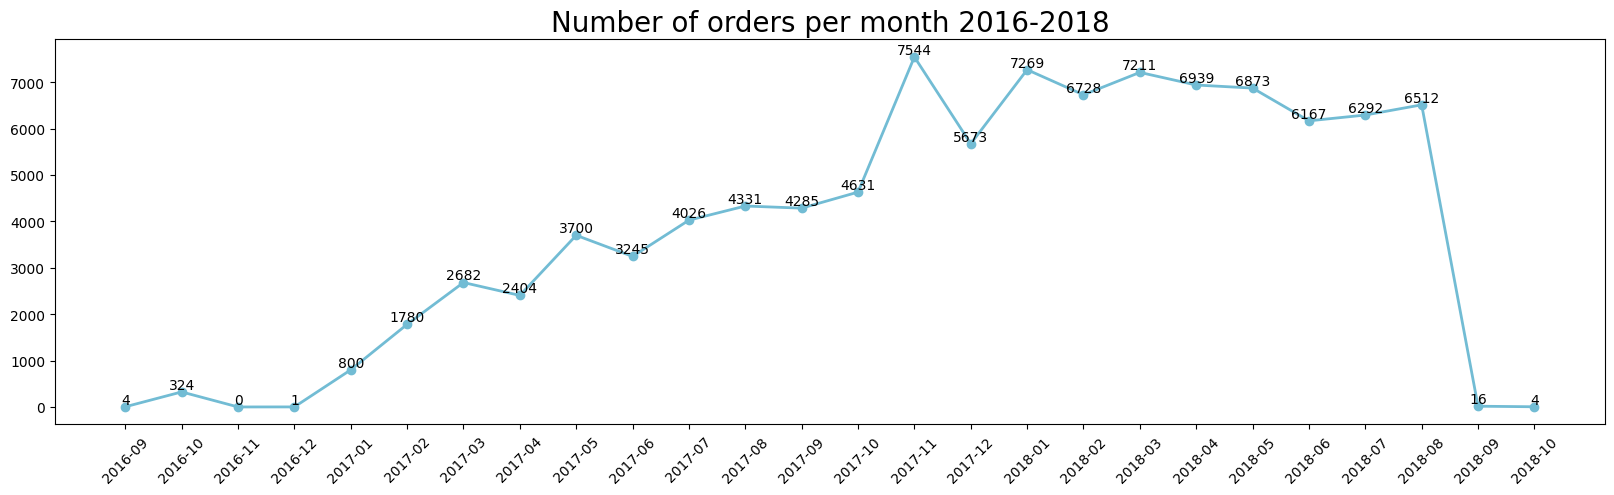

In [47]:
plt.figure(figsize=(20,5))
plt.plot(monthly_orders_df['order_purchase_timestamp'],
         monthly_orders_df['order_count'],
         marker='o',
         linewidth=2,
         color='#72BCD4')
plt.title('Number of orders per month 2016-2018', loc='center', fontsize=20)

#add annotations
for i, (x,y) in enumerate(zip(monthly_orders_df['order_purchase_timestamp'],monthly_orders_df['order_count'])):
  plt.text(x, y, f'{y}', fontsize=10, ha='center', va='bottom')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.show()

> Sebanyak 99.441 order dibuat antara bulan September 2016 hingga Oktober 2018 dengan total pembelian mencapai 13.591.643 BRL (Brazilian Real).

### **Trend pembelian (purchase amount) dalam bulan**

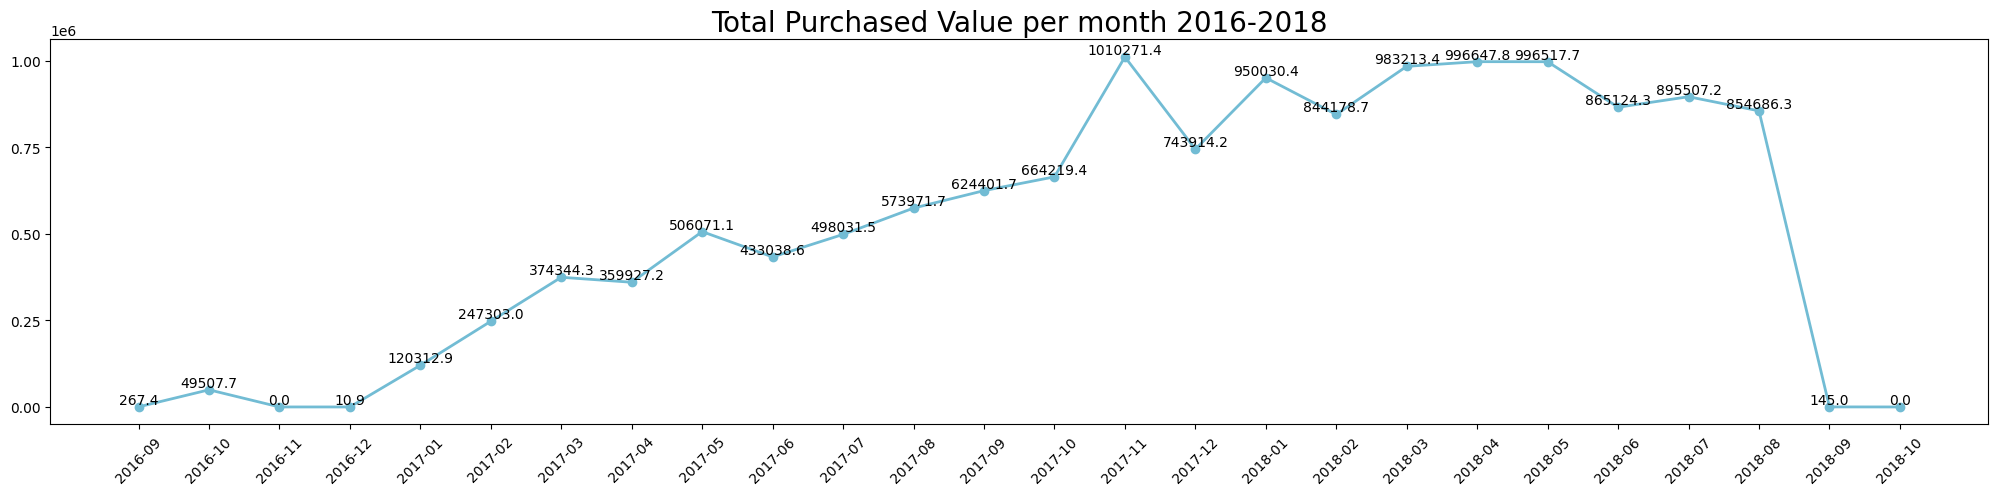

In [48]:
plt.figure(figsize=(25,5))
plt.plot(monthly_orders_df['order_purchase_timestamp'],
         monthly_orders_df['revenue'],
         marker='o',
         linewidth=2,
         color='#72BCD4')
plt.title('Total Purchased Value per month 2016-2018', loc='center', fontsize=20)

#add annotations
for i, (x,y) in enumerate(zip(monthly_orders_df['order_purchase_timestamp'],monthly_orders_df['revenue'])):
  plt.text(x, y+0.05, f'{y:.1f}', fontsize=10, ha='center', va='bottom')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.yticks(np.arange(monthly_orders_df['revenue'].min(),monthly_orders_df['revenue'].max(), 250000))
plt.show()

> Sebanyak 99.441 order dibuat antara bulan September 2016 hingga Oktober 2018 dengan total pembelian mencapai 13.591.643 BRL (Brazilian Real).

## **Pertanyaan 3: Rata-rata waktu delivery produk**

**Rata-rata waktu aktual delivery produk**

In [49]:
delivery_time = orders_product_df['order_delivered_customer_date'] - orders_product_df['order_purchase_timestamp']

#convert to seconds
delivery_time_seconds = delivery_time.apply(lambda x: x.total_seconds())

#convert seconds to days
orders_product_df['delivery_time_days'] = round(delivery_time_seconds/86400,2)

orders_product_df['delivery_time_days']

0          8.44
1         13.78
2          9.39
3         13.21
4          2.87
          ...  
113420    22.19
113421    24.86
113422    17.09
113423    17.09
113424     7.67
Name: delivery_time_days, Length: 113425, dtype: float64

In [50]:
orders_product_df['delivery_time_days'].describe()

count    110196.000000
mean         12.472609
std           9.445649
min           0.530000
25%           6.740000
50%          10.180000
75%          15.540000
max         209.630000
Name: delivery_time_days, dtype: float64

> Rata-rata aktual delivery produk adalah 12 hari. Delivery produk tercepat ke pelanggan kurang dari sehari dan delivery produk terlama dapat mencapai 209 hari.

**Rata-rata waktu estimasi pengiriman produk**

In [52]:
estimated_delivery_time = orders_product_df['order_estimated_delivery_date'] - orders_product_df['order_purchase_timestamp']

#convert to seconds
estimated_delivery_time_seconds = estimated_delivery_time.apply(lambda x: x.total_seconds())
estimated_delivery_time_df = round(estimated_delivery_time_seconds/86400,2)

estimated_delivery_time_df.describe()

count    113425.000000
mean         23.831183
std           8.888046
min           1.650000
25%          18.370000
50%          23.250000
75%          28.470000
max         155.140000
dtype: float64

> Rata-rata estimasi delivery produk adalah 23 hari. Estimasi delivery produk tercepat ke pelanggan kurang dari 2 hari dan delivery produk terlama dapat mencapai 155 hari.

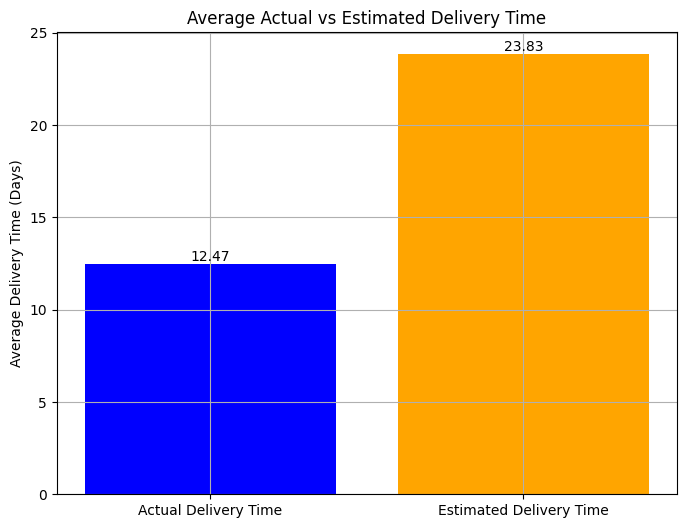

In [64]:
avg_actual_delivery_time = orders_product_df['delivery_time_days'].mean()
avg_estimated_delivery_time = estimated_delivery_time_df.mean()
categories = ['Actual Delivery Time', 'Estimated Delivery Time']
avg_delivery_times = [avg_actual_delivery_time, avg_estimated_delivery_time]

plt.figure(figsize=(8, 6))
plt.bar(categories, avg_delivery_times, color=['blue', 'orange'])
plt.ylabel('Average Delivery Time (Days)')
plt.title('Average Actual vs Estimated Delivery Time')
plt.grid(True)

#add annotation
for i, val in enumerate(avg_delivery_times):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom')

plt.show()

> **Berdasarkan data ini, rata-rata durasi aktual pengiriman produk lebih pendek dari estimasi waktu pengiriman**. Ini menunjukkan bahwa produk sampai lebih cepat ke pelanggan dari estimasi waktu yang diberikan oleh penjual.

In [53]:
orders_product_df.to_csv('ecommerce_datasets.csv', header=True, index=False)

## **Pertanyaan 4: Segmentasi Pelanggan**

### **RFM Analysis**

In [54]:
rfm_df = orders_product_df.groupby(by='customer_id', as_index=False).agg({
    'order_purchase_timestamp': 'max',
    'order_id':'nunique',
    'price': 'sum'
})

rfm_df.columns = ['customer_id', 'max_purchase_timestamp', 'frequency', 'monetary']

rfm_df['max_purchase_timestamp'] = rfm_df['max_purchase_timestamp'].dt.date
recent_date = orders_product_df['order_purchase_timestamp'].dt.date.max()
rfm_df['recency'] = rfm_df['max_purchase_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_purchase_timestamp', axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


In [55]:
rfm_df['R'] = pd.qcut(rfm_df['recency'], 5, labels=[5,4,3,2,1])
rfm_df['F'] = rfm_df['frequency']
rfm_df['M'] = pd.qcut(rfm_df['monetary'], 5, labels=[1,2,3,4,5])

rfm_df['RFM_scores'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)
rfm_df

,customer_id,frequency,monetary,recency,R,F,M,RFM_scores
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,2,1,3,213
1,000161a058600d5901f007fab4c27140,1,54.90,458,1,1,2,112
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,1,1,5,115
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,2,1,4,214
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,4,1,3,413
...,...,...,...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,1,54.90,202,4,1,2,412
99437,fffeda5b6d849fbd39689bb92087f431,1,47.90,148,4,1,2,412
99438,ffff42319e9b2d713724ae527742af25,1,199.90,126,5,1,5,515
99439,ffffa3172527f765de70084a7e53aae8,1,21.80,410,2,1,1,211


<ipython-input-69-2c8ed99c33de>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='recency', x='customer_id',
<ipython-input-69-2c8ed99c33de>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='frequency', x='customer_id',
<ipython-input-69-2c8ed99c33de>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='monetary', x='customer_id',


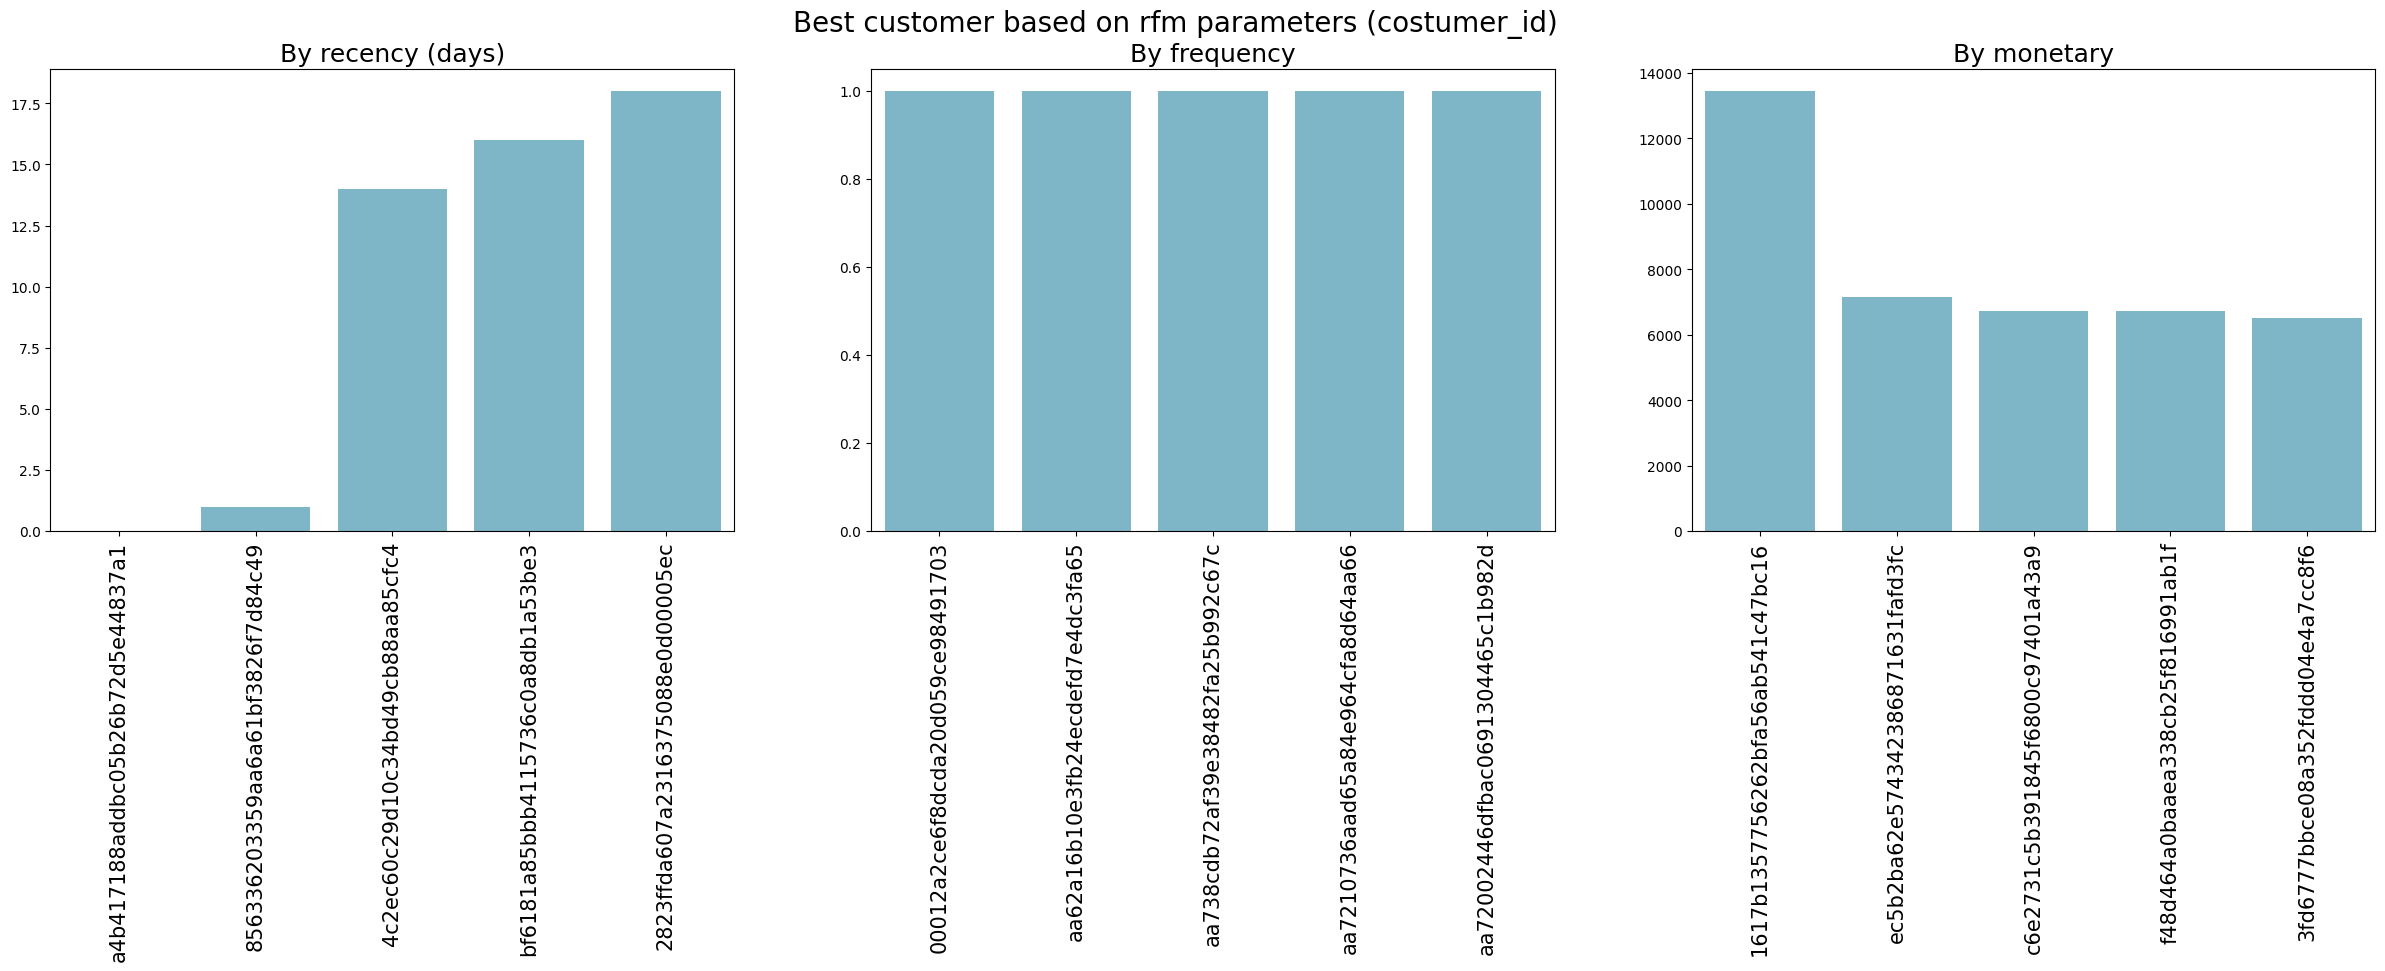

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y='recency', x='customer_id',
            data = rfm_df.sort_values(by='recency',
                                      ascending=True).head(5),
            palette = colors,
            ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By recency (days)', loc='center', fontsize=18)
ax[0].tick_params(axis='x',labelsize=15, labelrotation=90)

sns.barplot(y='frequency', x='customer_id',
            data = rfm_df.sort_values(by='frequency',
                                      ascending=False).head(5),
            palette = colors,
            ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By frequency', loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, labelrotation=90)

sns.barplot(y='monetary', x='customer_id',
            data = rfm_df.sort_values(by='monetary',
                                      ascending=False).head(5),
            palette = colors,
            ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By monetary', loc='center', fontsize=18)
ax[2].tick_params(axis='x',labelsize=15,labelrotation=90)

plt.suptitle('Best customer based on rfm parameters (costumer_id)', fontsize=20)
plt.show()

### **Customers Segmentation Based on RFM Analysis**

Rank and customers segmentation based on RFM analysis:
1. **Champions** - Bought recently, buy often and spend the most
2. **Loyal Customers** - Buy on a regular basis, responsive to promotions
3. **Potential Customers** - Recent customers with average frequency
4. **New Customers** - Bought most recently, but not often
5. **Promising** - Recent shoppers, but haven't spent much
6. **Need Attention** - above average recency, frequency and monetary values
7. **About to Sleep** - below average recency and frequency
8. **At Risk** - Sometime since they've purchased
9. **Can not Lose** - Used to purchase frequently but haven't returned for a long time
10. **Hibernating** - Last purchase was long back and low number of orders
11. **Lost** - Haven't bought in a long timg, only bought once, spent very little

In [56]:
cust_segmentation = {
    r'11': 'Lost',
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'Can not Lose',
    r'[1-2]5': 'At Risk',
    r'3[1-2]': 'About to Sleep',
    r'3[3-5]': 'Need Attention',
    r'4[1-5]': 'Promising',
    r'5[1-2]': 'New Customers',
    r'53': 'Potential Loyalist',
    r'54': 'Loyal Customers',
    r'55': 'Champions'
}

rfm_df['segment'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str)
rfm_df['segment'] = rfm_df['segment'].replace(cust_segmentation, regex=True)
rfm_df

,customer_id,frequency,monetary,recency,R,F,M,RFM_scores,segment
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,2,1,3,213,Hibernating
1,000161a058600d5901f007fab4c27140,1,54.90,458,1,1,2,112,Lost
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,1,1,5,115,Lost
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,2,1,4,214,Hibernating
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,4,1,3,413,Promising
...,...,...,...,...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,1,54.90,202,4,1,2,412,Promising
99437,fffeda5b6d849fbd39689bb92087f431,1,47.90,148,4,1,2,412,Promising
99438,ffff42319e9b2d713724ae527742af25,1,199.90,126,5,1,5,515,New Customers
99439,ffffa3172527f765de70084a7e53aae8,1,21.80,410,2,1,1,211,Hibernating


In [57]:
rank_cust = {
    r'Lost' : '11',
    r'Hibernating': '10',
    r'Can not Lose': '9',
    r'At Risk': '8',
    r'About to Sleep': '7',
    r'Need Attention': '6',
    r'Promising': '5',
    r'New Customers': '4',
    r'Potential Loyalist': '3',
    r'Loyal Customers': '2',
    r'Champions' : '1'
}

rfm_df['rank'] = rfm_df['segment'].replace(rank_cust, regex=True)
rfm_df

,customer_id,frequency,monetary,recency,R,F,M,RFM_scores,segment,rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,2,1,3,213,Hibernating,10
1,000161a058600d5901f007fab4c27140,1,54.90,458,1,1,2,112,Lost,11
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,1,1,5,115,Lost,11
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,2,1,4,214,Hibernating,10
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,4,1,3,413,Promising,5
...,...,...,...,...,...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,1,54.90,202,4,1,2,412,Promising,5
99437,fffeda5b6d849fbd39689bb92087f431,1,47.90,148,4,1,2,412,Promising,5
99438,ffff42319e9b2d713724ae527742af25,1,199.90,126,5,1,5,515,New Customers,4
99439,ffffa3172527f765de70084a7e53aae8,1,21.80,410,2,1,1,211,Hibernating,10


In [58]:
rfm_df['rank'] = pd.to_numeric(rfm_df['rank'])
cust_classification = rfm_df.groupby(by=['rank','segment']).agg({
    'customer_id':'nunique'
}, inplace=True).sort_values(by='rank', ascending=True)

cust_classification = cust_classification.reset_index()
cust_classification.rename(columns={
    'customer_id': 'customers'
}, inplace=True)

cust_classification

,rank,segment,customers
0,4,New Customers,19973
1,5,Promising,20041
2,7,About to Sleep,19670
3,10,Hibernating,19955
4,11,Lost,19802


In [59]:
rfm_df.sort_values(by='rank').head()

,customer_id,frequency,monetary,recency,R,F,M,RFM_scores,segment,rank
48566,7d49493a8c9e940d1e75b3dd732191f3,1,38.49,124,5,1,2,512,New Customers,4
76940,c557c88c4ec1f4c74389e95230d73f3e,1,98.99,74,5,1,3,513,New Customers,4
45218,74d81e243faed576ff50c5428e8cdbaf,1,79.90,133,5,1,3,513,New Customers,4
45220,74d869510afc0001afbfc46498296ed9,1,270.00,68,5,1,5,515,New Customers,4
18295,2f2608d59dd55a280542174b34c129b1,1,299.80,135,5,1,5,515,New Customers,4


Text(0.5, 1.0, 'Customers Segmentation Based On RFM Analysis')

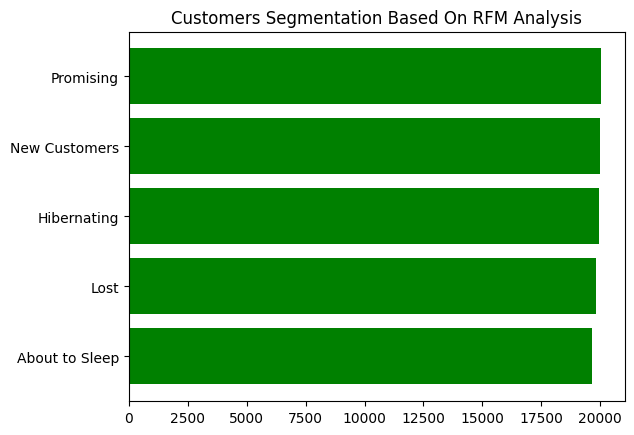

In [60]:
cust_classification.sort_values(by='customers', inplace=True)
plt.barh(y=cust_classification['segment'],
         width=cust_classification['customers'],
         color = 'green')
plt.title('Customers Segmentation Based On RFM Analysis')

In [61]:
#rfm_df.to_csv('rfm_datasets.csv', header=True, index=False)

### **Targeted Customers**

* Untuk menargetkan pelanggan baru, perusahaan dapat mengkategorikan profil pelanggan berdasarkan karakteristik pelanggan saat ini, yaitu:
  * Lokasi di Sao Paulo
  * Pengguna kartu kredit
  * Menyukai kategori berupa barang bed_bath_table, health_beauty, sport_leisure, computers_accessories, dan furniture_decor
* Untuk menaikkan loyalitas pelanggan, perusahaan dapat memfokuskan segmentasi pelanggan 'New Customers' dan 'Promising' dengan pendekatan yang sesuai.

# **Conclusion**

* Kategori barang yang paling diminati adalah bed_bath_table, yang diikuti oleh health_beauty, sport_leisure, computer_accessories, dan furniture decor. Lima kategori teratas menunjukkan adanya tren pemenuhan gaya hidup yang menjadi kebutuhan.
* Dengan total 99.441 order dan pembelian senilai 13.591.643 BRL, menampilkan tren yang menarik. Salah satunya adalah puncak aktivitas terjadi pada November 2017, seiring Black Friday, dengan peningkatan konsisten hingga Januari 2018. Meski demikian, penurunan signifikan pada September-Oktober 2018 menunjukkan potensi ketidaklengkapan data.
* Rata-rata durasi aktual pengiriman barang ke konsumen adalah 12 hari. Durasi ini lebih pendek dibanding rata-rata estimasi pengiriman (23 hari), ini menunjukkan bahwa pengiriman logistik barang lebih cepat dari perkiraan.
* Segmentasi pelanggan terbagi menjadi 5 kelompok yaitu new customers, promising, about to sleep, lost, dan hibernating. Kelimanya memiliki persebaran jumlah pelanggan yang hampir merata. Untuk menambah jumlah pelanggan setia, penjual dapat memfokuskan segmen New Customers dan Promising dengan pendekatan yang cocok. Selain itu, penjual dapat menargetkan pelanggan baru berdasarkan karakteristik pelanggan saat ini.